In [8]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
survey = pd.read_csv("kaggle_survey_2020_responses.csv", low_memory=False)

In [3]:
survey = survey.drop(index=0)

### AGE 

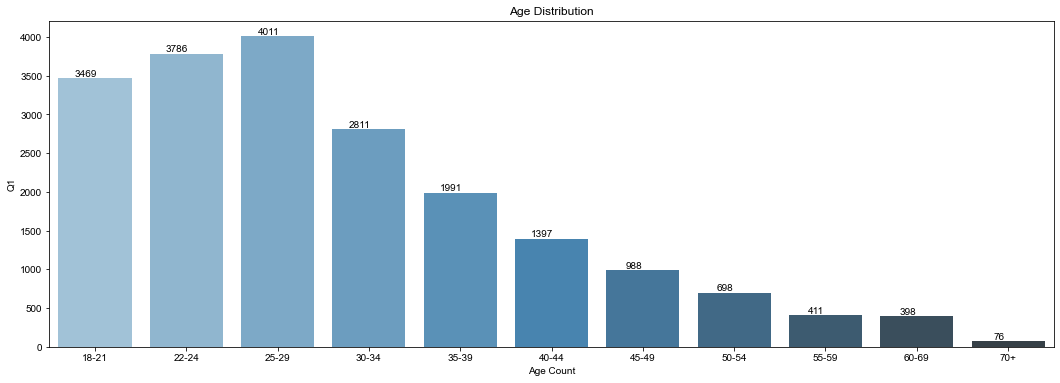

In [4]:
q1_data= survey["Q1"].value_counts().sort_index()
plt.figure(figsize=(18, 6))
plt.title("Age Distribution")
plt.xlabel("Age Count")
plt.ylabel("Age Range")
graph = sns.barplot(x=q1_data.index, y=q1_data, palette="Blues_d")
sns.set_style("darkgrid")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### From the chart above it is observed that of all the people who took this survey, people in their mid to late 20's are the most popular. 

## Gender 

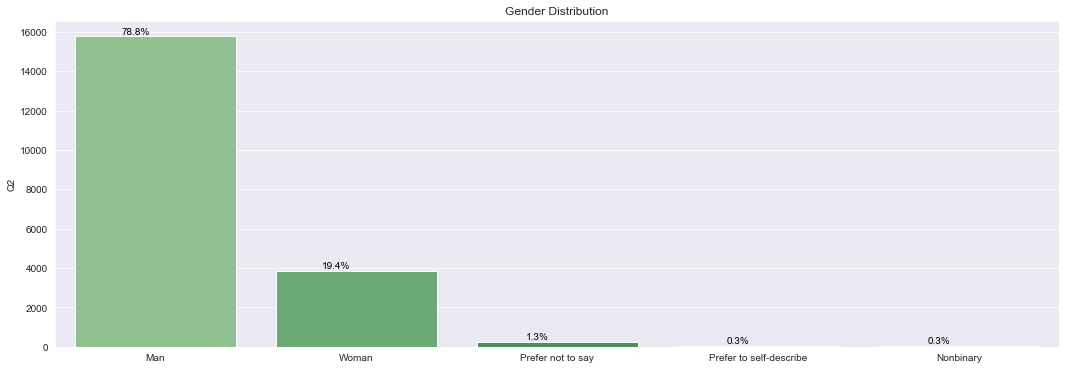

In [5]:
q2_data= survey["Q2"].value_counts()
plt.figure(figsize=(18, 6))
plt.title("Gender Distribution")
graph = sns.barplot(x=q2_data.index, y=q2_data, palette="Greens_d")

for p in graph.patches:
        graph.annotate('{:.1f}%'.format((p.get_height() / sum(q2_data)) * 100), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Based on the gender data it is observed that a whooping 78.8% of data scientist/analyst who took the survey are men which is a 59.4% increase compared to the women who took the survey(19.4%)

### Gender vs Age 

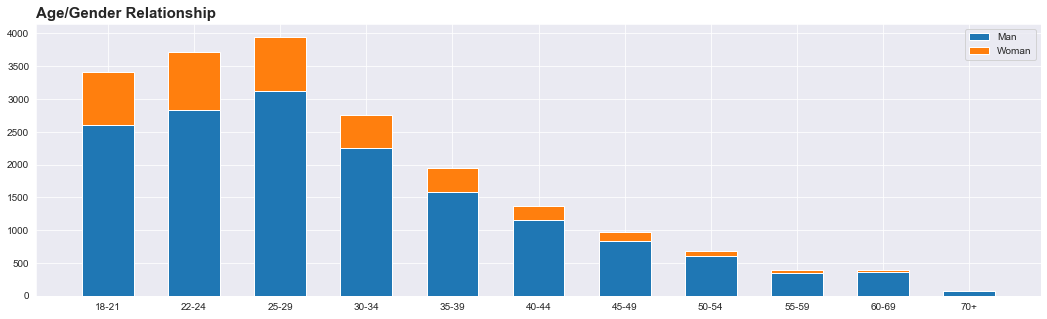

In [13]:
# Focus on the two major genders for analytic purposes 
bar_data = survey.groupby("Q1")["Q2"].value_counts().unstack()
bar_data.drop(columns=["Nonbinary", "Prefer not to say","Prefer to self-describe"], inplace=True)

# Plot Bar Chart 
fig, ax = plt.subplots(1,1, figsize=(18,5))
bf = np.zeros(len(bar_data), dtype=float)

for col in bar_data.columns:
    ax.bar(bar_data.index, bar_data[col], width=0.6, bottom=bf, label=col)
    bf += bar_data[col]
    
ax.set_title('Age/Gender Relationship', loc='left', fontsize=15, fontweight='bold')    
ax.legend()
plt.show()       

### The bar plot above let's us know that a higher percentage of Data Scientist (at least the ones that took this survey) are men 

### By Region 

<ipython-input-14-bdde4f40d6ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(reg.index, rotation=90)


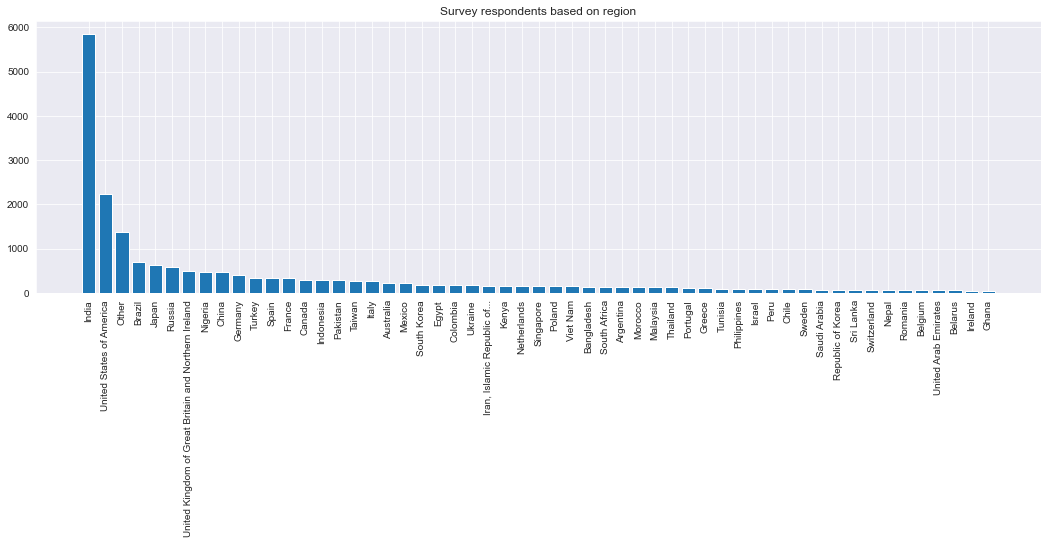

In [14]:
fig, ax = plt.subplots(1,1, figsize=(18,5))

reg = survey["Q3"].value_counts()
ax.bar(reg.index, reg)
ax.set_xticklabels(reg.index, rotation=90)
ax.set_title(label="Survey respondents based on region", loc="center")
plt.show()

#### India tops the chart for Data Scientists by a long shot followed (not closely) by the United states. It's great to see Nigeria amongst the top 10 countries for Data Scientists/Analyst